In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
%cd C:\Users\purvi\OneDrive\Documents\Capston Project

C:\Users\purvi\OneDrive\Documents\Capston Project


In [3]:
df = pd.read_csv("Forecast for Product Demand_Clean.csv",parse_dates=['Date'])

In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, skew #for some statistics
from scipy import stats #qqplot
import statsmodels.api as sm #for decomposing the trends, seasonality etc.

from statsmodels.tsa.statespace.sarimax import SARIMAX #the big daddy

In [5]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
926147,Product_1759,Whse_J,Category_001,2016-11-10,2
926148,Product_1974,Whse_J,Category_006,2016-04-27,1
926149,Product_1787,Whse_J,Category_006,2016-04-28,2500
926150,Product_0901,Whse_J,Category_023,2016-10-07,50


In [6]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [7]:
df = df.dropna()

In [8]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
926147,Product_1759,Whse_J,Category_001,2016-11-10,2
926148,Product_1974,Whse_J,Category_006,2016-04-27,1
926149,Product_1787,Whse_J,Category_006,2016-04-28,2500
926150,Product_0901,Whse_J,Category_023,2016-10-07,50


In [9]:
# Check any number of columns with NaN
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

0  /  5
0  /  924272


In [10]:
# Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date')

In [11]:
df['Order_Demand'] = df['Order_Demand'].astype(str)

In [12]:
#Target Feature - Order_Demand
#Removing () from the target feature.
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")

In [13]:
df['Order_Demand'] = df['Order_Demand'].astype(str)

In [14]:
#Next step is to change the data type.
df['Order_Demand'] = df['Order_Demand'].astype('int64')

In [15]:
df['Date'].min() , df['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [16]:
df.shape

(924272, 5)

In [17]:
# Feature Engineering
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [18]:
# Lag feature for time series data
df['Order_Demand_Lag'] = df.groupby('Product_Code')['Order_Demand'].shift(1)

In [19]:
# Model Training and Testing
train, test = train_test_split(df, test_size=0.2, shuffle=False)

In [20]:
# Prepare features and target
X_train = train[['Month', 'Year', 'Order_Demand_Lag']]
y_train = train['Order_Demand']
X_test = test[['Month', 'Year', 'Order_Demand_Lag']]
y_test = test['Order_Demand']

In [21]:
# XGBoost Model
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
# Make predictions on the test set
predictions = model.predict(X_test)

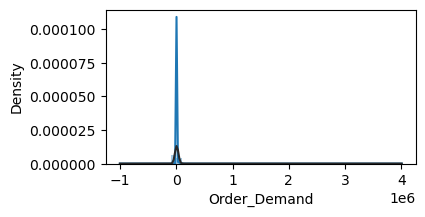

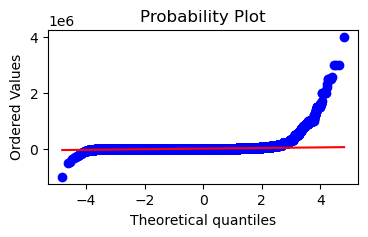

In [23]:
#Lets check the ditribution of the target variable (Order_Demand)
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sns.distplot(df['Order_Demand'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()

In [24]:
df.shape

(924272, 8)

In [25]:
df['Order_Demand'].skew()

30.35559378239146

In [26]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Month,Year,Order_Demand_Lag
42558,Product_0965,Whse_A,Category_006,2011-01-08,2,1,2011,NaN
66642,Product_1724,Whse_A,Category_003,2011-05-31,108,5,2011,NaN
8269,Product_1521,Whse_S,Category_019,2011-06-24,85000,6,2011,NaN
8270,Product_1521,Whse_S,Category_019,2011-06-24,7000,6,2011,85000.0
67054,Product_1507,Whse_C,Category_019,2011-09-02,1250,9,2011,NaN
...,...,...,...,...,...,...,...,...
812848,Product_1926,Whse_J,Category_001,2017-01-06,2,1,2017,5.0
813330,Product_0025,Whse_J,Category_005,2017-01-06,400,1,2017,500.0
802866,Product_0471,Whse_C,Category_015,2017-01-09,30,1,2017,-30.0
802474,Product_0250,Whse_C,Category_007,2017-01-09,148,1,2017,-148.0


In [27]:
df['Order_Demand'].value_counts().sort_values(ascending = False)

Order_Demand
 1000     93666
 100      73429
 1        51474
 2000     45675
 500      43711
          ...  
 1033         1
 1686         1
 2877         1
 94500        1
-6814         1
Name: count, Length: 3749, dtype: int64

In [28]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
Month                        int32
Year                         int32
Order_Demand_Lag           float64
dtype: object

In [29]:
result = df.groupby('Warehouse').agg({'Order_Demand': np.sum}).sort_values('Order_Demand', ascending=False)
print(result)

           Order_Demand
Warehouse              
Whse_J       2983205803
Whse_S       1018327900
Whse_C        559519474
Whse_A        141019532


In [30]:
df.isnull().sum()

Product_Code           0
Warehouse              0
Product_Category       0
Date                   0
Order_Demand           0
Month                  0
Year                   0
Order_Demand_Lag    2160
dtype: int64

In [31]:
print(result)

           Order_Demand
Warehouse              
Whse_J       2983205803
Whse_S       1018327900
Whse_C        559519474
Whse_A        141019532


In [32]:
print (len(df['Product_Code'].value_counts()))

2160


In [33]:
rcParams['figure.figsize'] = 50,14

In [34]:
df['Product_Category'] = df['Product_Category'].astype('category')

In [35]:
rcParams['figure.figsize'] = 20,14

In [36]:
df['Product_Category'] = pd.Categorical(df['Product_Category'])

<Axes: xlabel='Product_Category', ylabel='count'>

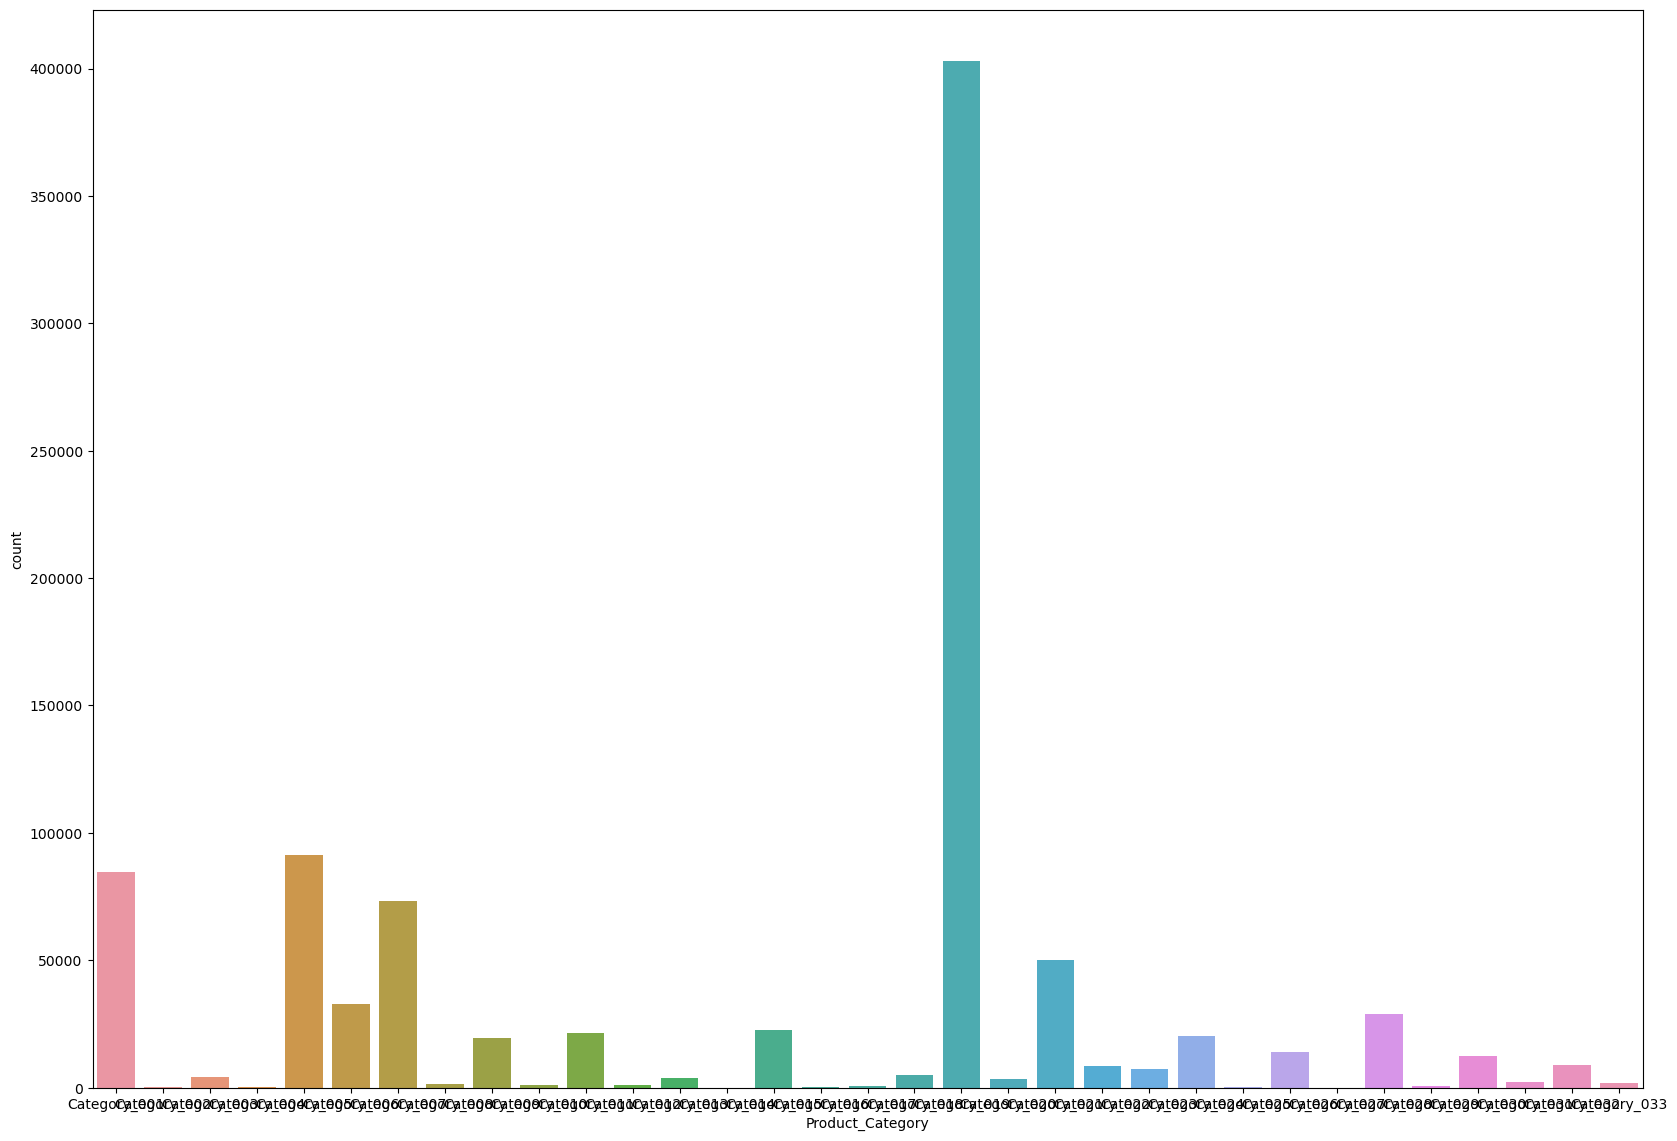

In [37]:
sns.countplot(x=df['Product_Category'].sort_values(ascending=True))

In [38]:
df['Product_Category'].unique()

['Category_006', 'Category_003', 'Category_019', 'Category_001', 'Category_023', ..., 'Category_012', 'Category_014', 'Category_002', 'Category_027', 'Category_016']
Length: 33
Categories (33, object): ['Category_001', 'Category_002', 'Category_003', 'Category_004', ..., 'Category_030', 'Category_031', 'Category_032', 'Category_033']

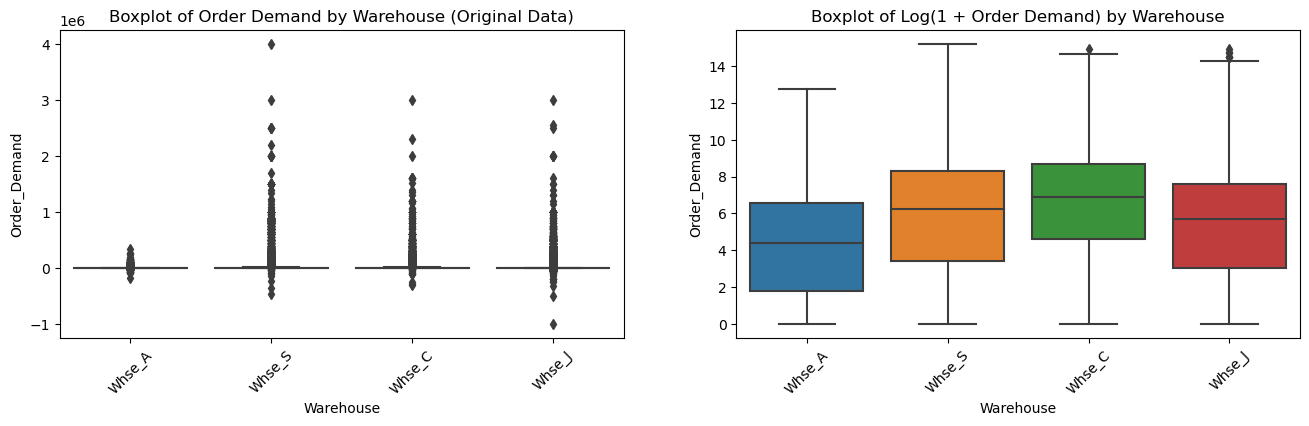

In [39]:
# Let's check the orders by warehouse.

# Checking with Boxplots
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16, 4
f, axes = plt.subplots(1, 2)
# Regular Data
sns.boxplot(x=df['Warehouse'], y=df['Order_Demand'], ax=axes[0])
# Data with Log Transformation
sns.boxplot(x=df['Warehouse'], y=np.log1p(df['Order_Demand']), ax=axes[1])

# Add titles
axes[0].set_title('Boxplot of Order Demand by Warehouse (Original Data)')
axes[1].set_title('Boxplot of Log(1 + Order Demand) by Warehouse')

# Rotate x-axis labels for better visibility
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.show()


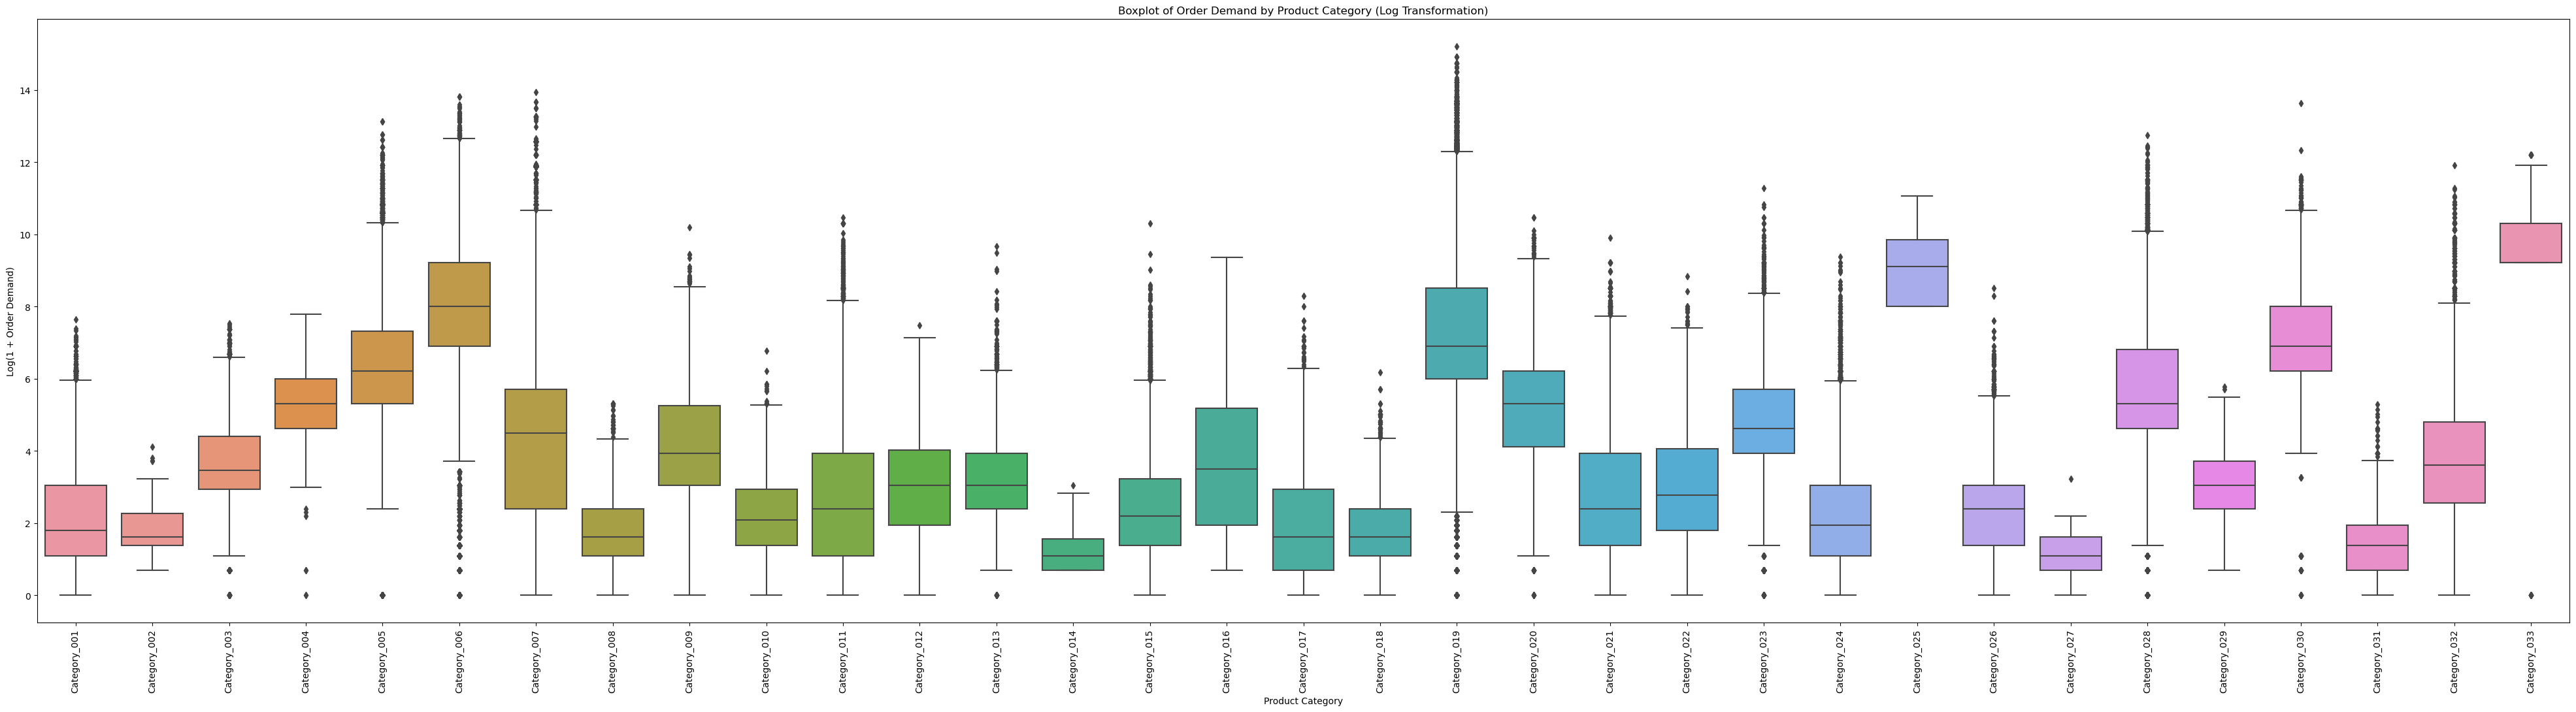

In [40]:
# Let's check the Orders by Product Category.
from matplotlib import rcParams
import seaborn as sns

# Set figure size
rcParams['figure.figsize'] = 50, 12

# Boxplot
sns.boxplot(x=df['Product_Category'].sort_values(), y=np.log1p(df['Order_Demand']))

# Add title and labels
plt.title('Boxplot of Order Demand by Product Category (Log Transformation)')
plt.xlabel('Product Category')
plt.ylabel('Log(1 + Order Demand)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [41]:
df = df.groupby('Date')['Order_Demand'].sum().reset_index()
#This gives us the total orders placed on each day.

In [42]:
#Index the date
df = df.set_index('Date')
df.index #Lets check the index

DatetimeIndex(['2011-01-08', '2011-05-31', '2011-06-24', '2011-09-02',
               '2011-09-27', '2011-09-30', '2011-10-20', '2011-10-31',
               '2011-11-04', '2011-11-18',
               ...
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09'],
              dtype='datetime64[ns]', name='Date', length=1729, freq=None)

In [43]:
y = df['Order_Demand'].resample('MS').mean()

In [44]:
#In case there are Null values, they can be imputed using bfill.
#y = y.fillna(y.bfill())

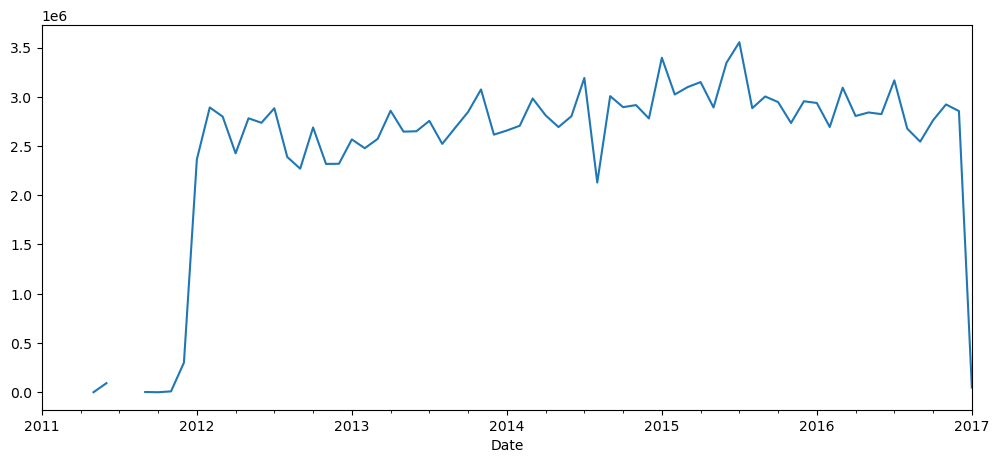

In [45]:
#Visualizing time series.

y.plot(figsize=(12,5))
plt.show()

#Takeaway: The sales are always low for the beginning of the year and the highest peak in demand every year is in the
#last quarter. The observed trend shows that orders were higher during 2014-2016 then reducing.

#Lets check it by decomposition.

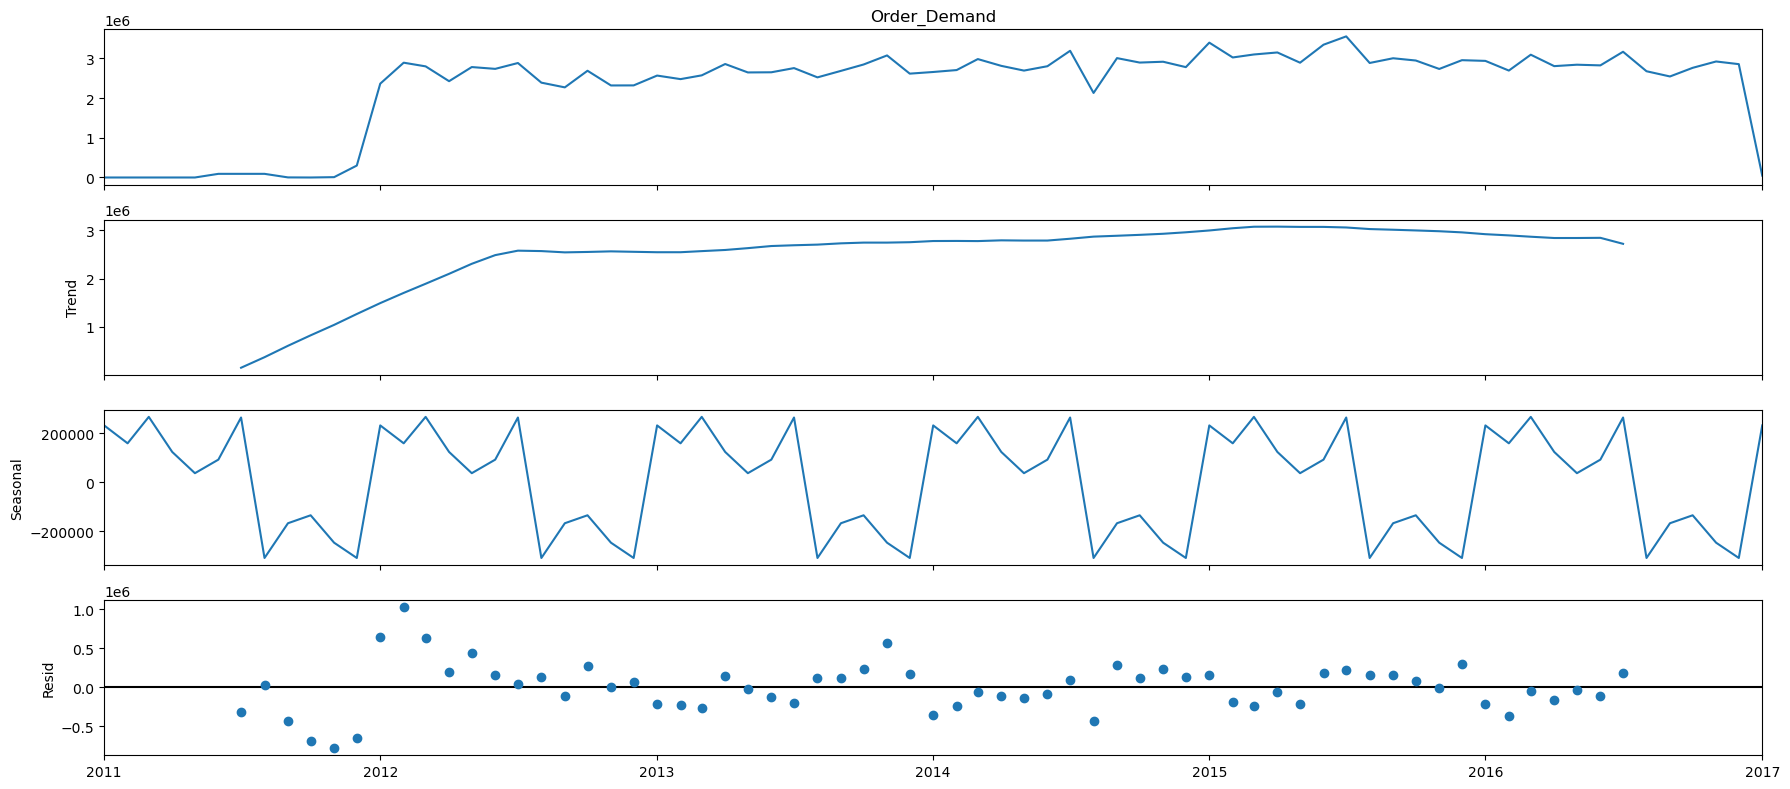

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm

# Assuming 'y' is your time series data
# Fill missing values with forward fill
y_filled = y.ffill()

# Perform seasonal decomposition
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_filled, model='additive')
fig = decomposition.plot()
plt.show()


In [47]:
# Check for NaN or infinite values
print(np.isnan(y).any())
print(np.isinf(y).any())


True
False


In [48]:
df

,Order_Demand
Date,
2011-01-08,2
2011-05-31,108
2011-06-24,92000
2011-09-02,1250
2011-09-27,28
...,...
2017-01-03,2400
2017-01-04,29250
2017-01-05,83929


In [49]:
#GRID SEARCH for Param Tuning.
#Sample params for seasonal arima. (SARIMAX).

#For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function 
#from the statsmodels module and assess its overall quality.

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [50]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2174.7258355152335
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1925.8465041788563
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1846.654674310842
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1409.0910282627488
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1878.604584903235
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1897.7395001337445
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1433.3963935783659
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1409.3178007255697
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2132.8760299781597
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1871.797417858578
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1772.5828381097963
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1384.8502776802204
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1930.7810360083222
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1868.3520557532229
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1443.0698389058205
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1386.5775427221722
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1959.3620739415683
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - 

C:\Users\purvi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1714.521308770958
SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1685.5292149386134
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1379.3536490064062
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1337.1253499721997


In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0453      0.757      0.060      0.952      -1.439       1.529
ma.L1         -0.5331      0.499     -1.068      0.286      -1.512       0.445
ar.S.L12      -0.0217      0.286     -0.076      0.940      -0.583       0.540
sigma2      3.523e+11   2.26e-12   1.56e+23      0.000    3.52e+11    3.52e+11


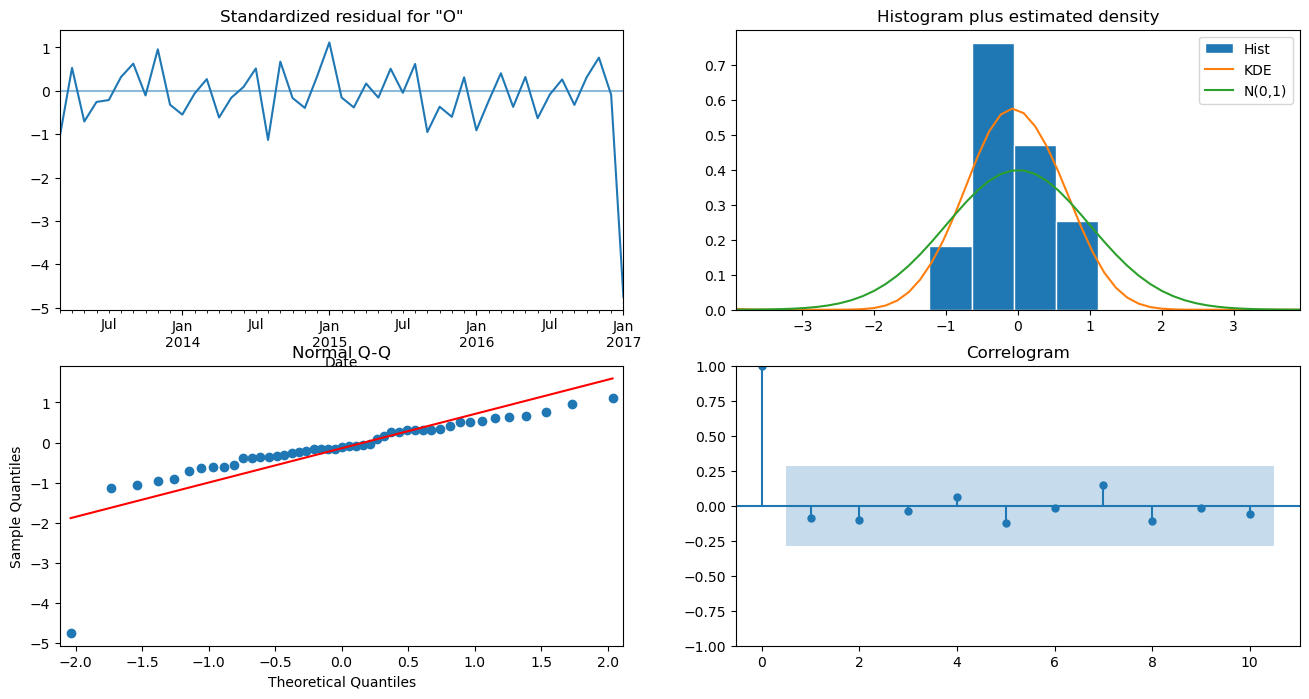

In [52]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()


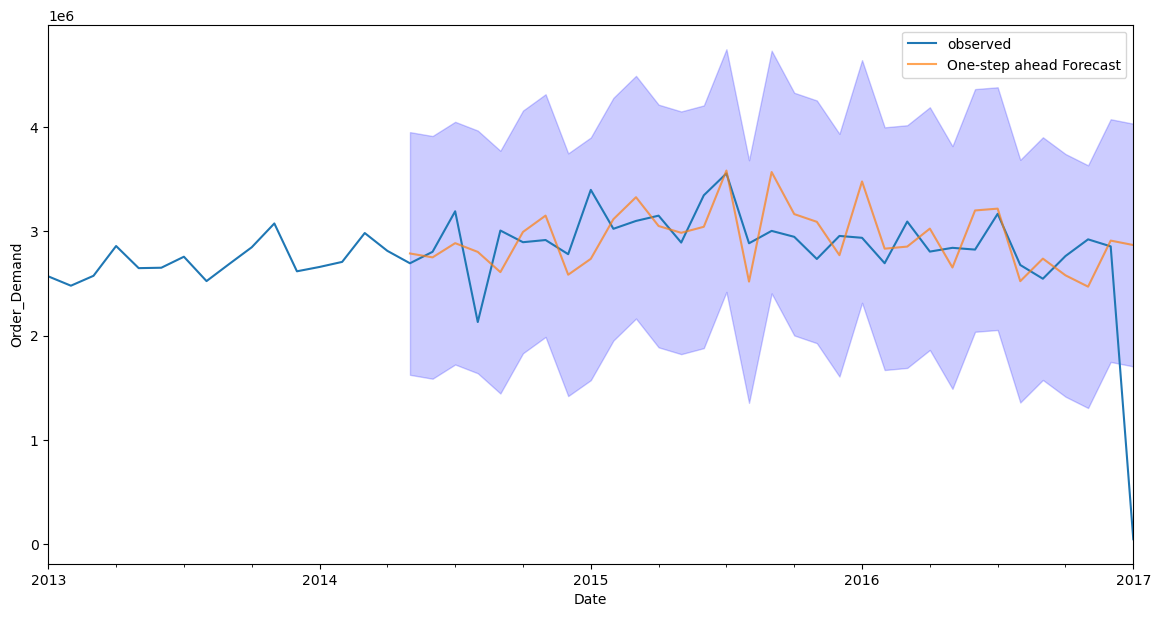

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2014-05-01'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int()

#Plotting real and forecasted values.
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

In [54]:
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 987600463.7491688


In [55]:
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))

RMSE: 31426.11


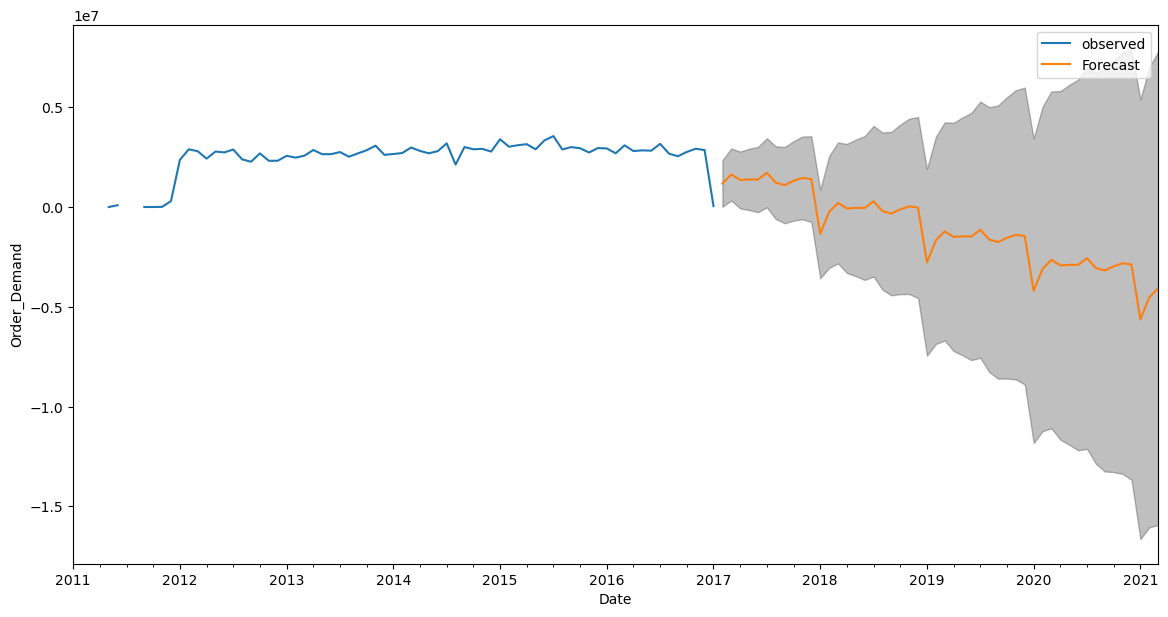

In [56]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()


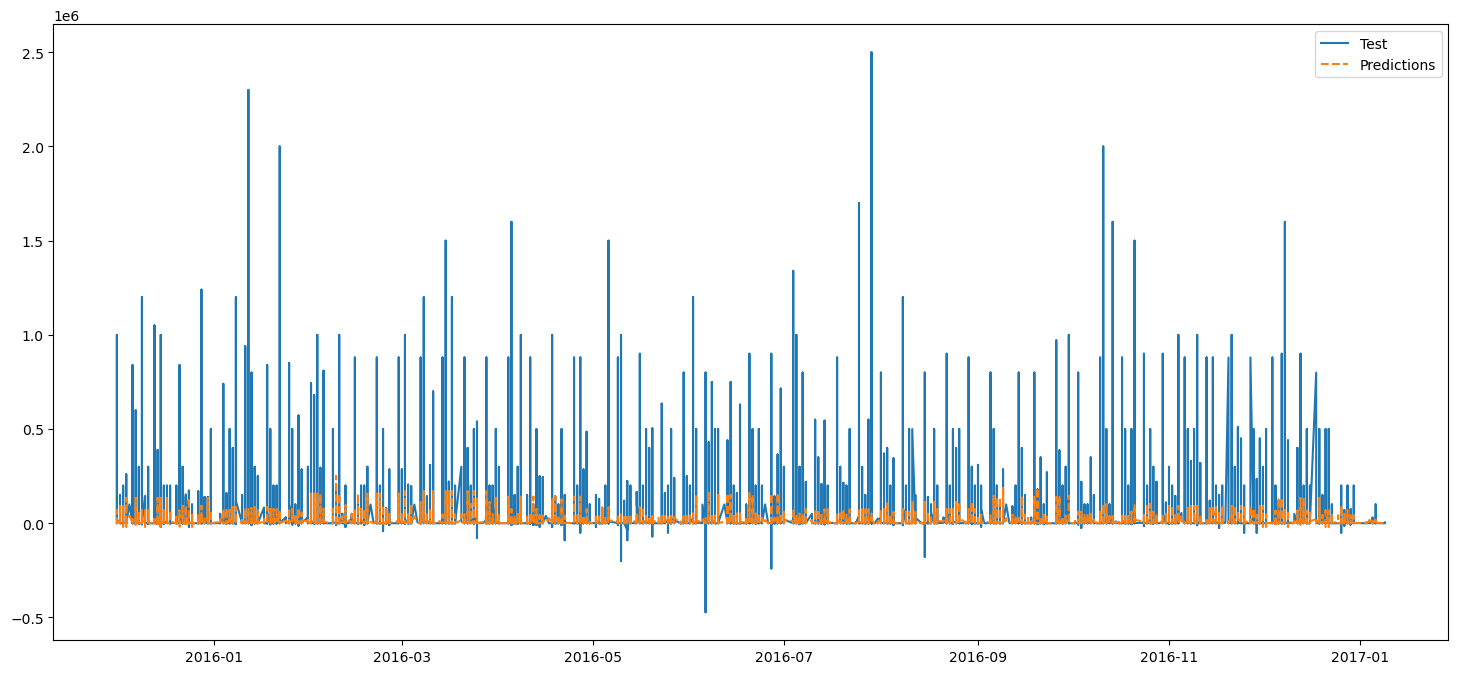

In [57]:
# Visualization
plt.plot(test['Date'], test['Order_Demand'], label='Test')
plt.plot(test['Date'], predictions, label='Predictions', linestyle='dashed')
plt.legend()
plt.show()

In [59]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [60]:
import tensorflow as tf

In [151]:
# Generate some sample time series data
np.random.seed(0)
t = np.arange(0, 100, 0.1)
X = np.sin(t) + np.random.normal(0, 0.1, size=t.shape)

In [188]:
window_size = 10  # Lag or window size
num_neurons = [32,64]  # Number of neurons in each LSTM layer
num_layers = len(num_neurons)  # Number of LSTM layers

In [189]:
# Prepare the data for LSTM
window_size = 10
X_train = []
y_train = []
for i in range(len(X) - window_size):
    X_train.append(X[i:i+window_size])
    y_train.append(X[i+window_size])
X_train, y_train = np.array(X_train), np.array(y_train)

In [190]:
# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [191]:
# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(window_size, 1)),
    tf.keras.layers.Dense(1)
])

In [192]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [193]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
31/31 [==============================] - 6s 10ms/step - loss: 0.1860
Epoch 2/10
31/31 [==============================] - 0s 10ms/step - loss: 0.1001
Epoch 3/10
31/31 [==============================] - 0s 10ms/step - loss: 0.0730
Epoch 4/10
31/31 [==============================] - 0s 10ms/step - loss: 0.0398
Epoch 5/10
31/31 [==============================] - 0s 10ms/step - loss: 0.0160
Epoch 6/10
31/31 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 7/10
31/31 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 8/10
31/31 [==============================] - 0s 11ms/step - loss: 0.0142
Epoch 9/10
31/31 [==============================] - 0s 12ms/step - loss: 0.0143
Epoch 10/10
31/31 [==============================] - 0s 10ms/step - loss: 0.0141


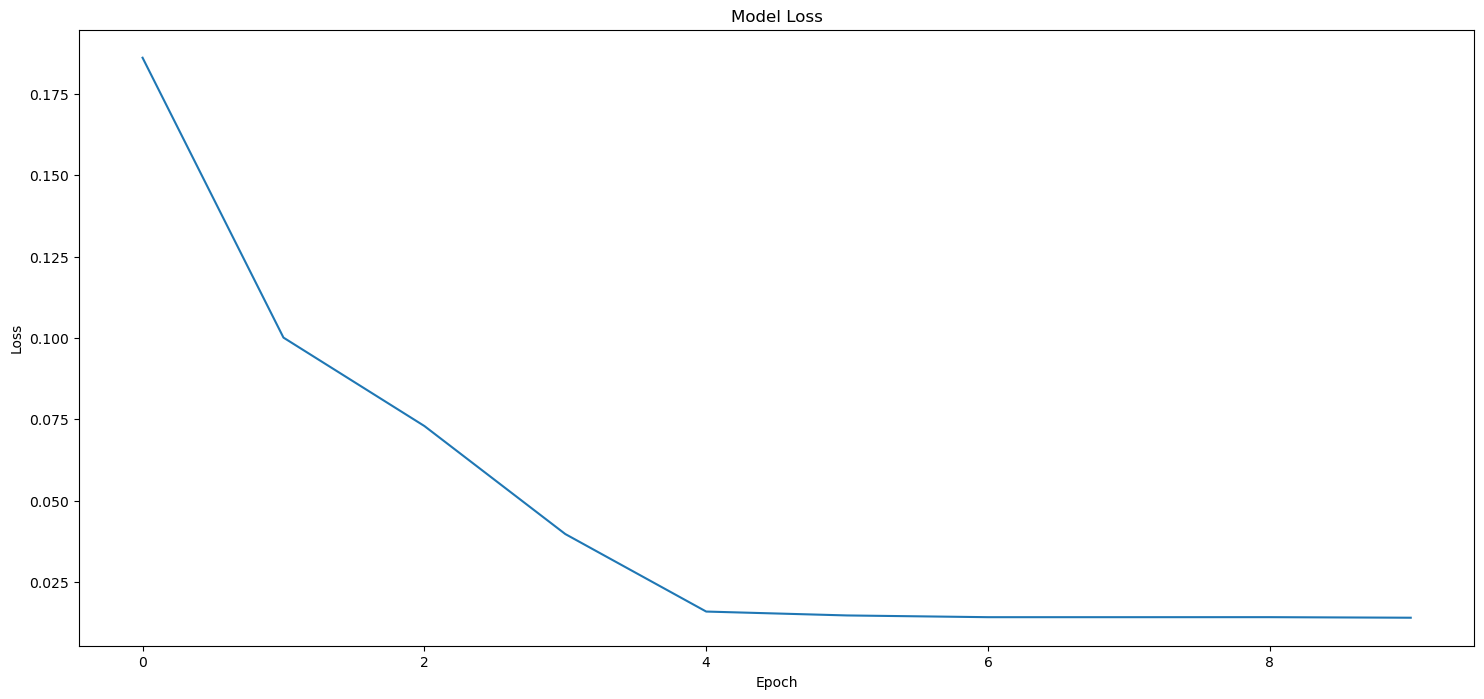

In [194]:
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [195]:
# Predict on the entire sequence
X_test = X[-window_size:].reshape(1, window_size, 1)
predicted_values = []
for _ in range(50):
    next_value = model.predict(X_test)
    predicted_values.append(next_value)
    X_test = np.append(X_test[:, 1:, :], next_value.reshape(1, 1, 1), axis=1)

1/1 [==============================] - 0s 62ms/step


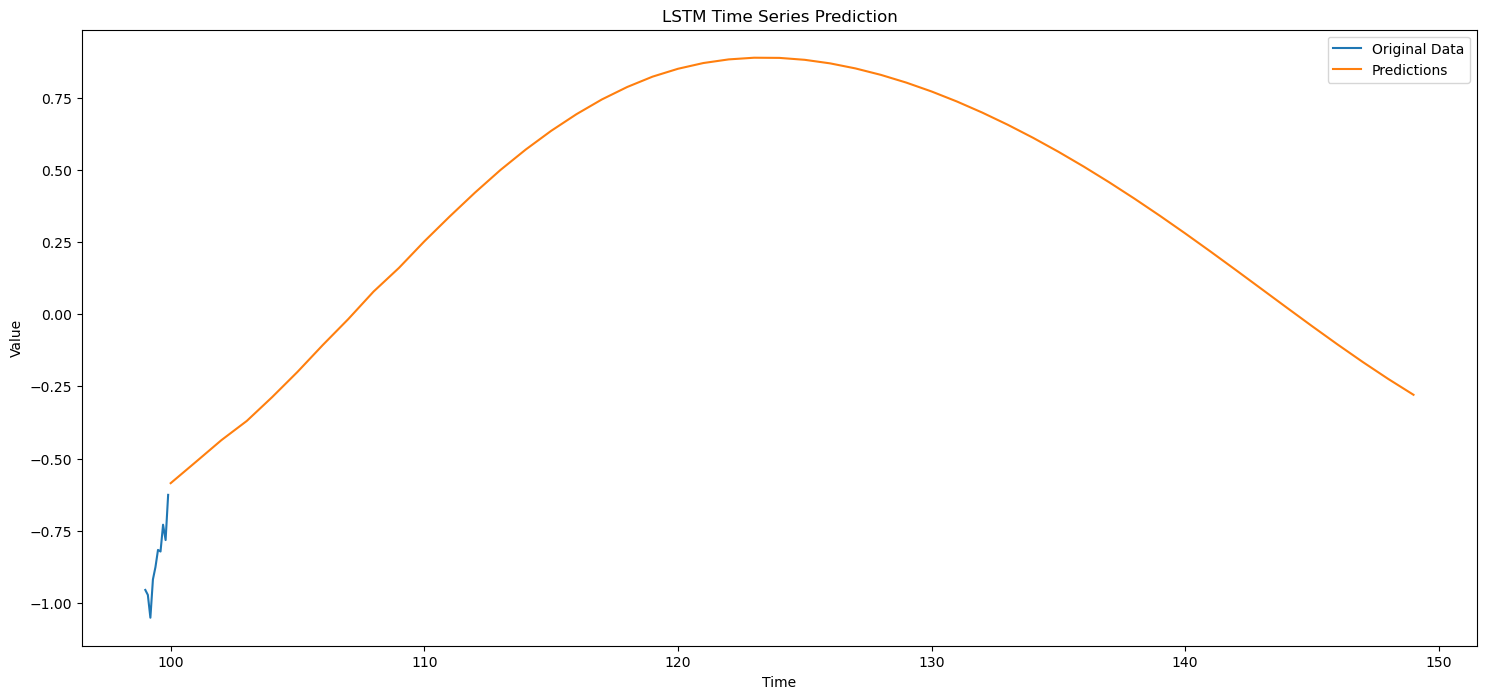

In [196]:
# Plot the results
plt.plot(t[-window_size:], X[-window_size:], label='Original Data')
plt.plot(np.arange(100, 150, 1), np.array(predicted_values).reshape(-1), label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM Time Series Prediction')
plt.legend()
plt.show()

In [197]:
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')  

Mean Squared Error: 987600463.7491688
